# Exploring the Impact of Sleep Deprivation on Cognitive Performance and Emotional Regulation

This project dives into a dataset examining how sleep deprivation affects cognitive performance and emotional regulation. Using Python and libraries like `pandas`, `numpy`, `matplotlib`, and `seaborn`, the analysis explores key sleep metrics (e.g., sleep hours, sleep quality) and their relationships with cognitive tasks (e.g., reaction times, memory accuracy) and emotional stability. Through data exploration, statistical analysis, and visualizations, the project uncovers patterns and trends, providing actionable insights into the effects of sleep deprivation on mental and emotional well-being. The findings are supported by visualizations like histograms, scatter plots, boxplots, and correlation heatmaps, offering a comprehensive understanding of the dataset.

**ETL Pipeline Repository**: [sleep-cognition-etl](https://github.com/mdislam1/sleep-cognition-etl)

In [13]:
# Import necessary libraries for data analysis, visualization, and database interaction
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load data from the SQLite database into a pandas DataFrame for analysis

# Database file name
db_name = 'sleep_study.db'

try:
    conn = sqlite3.connect(db_name, isolation_level="EXCLUSIVE")
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sleep_data;")
    rows = cursor.fetchall()
    columns = [description[0] for description in cursor.description]
    df = pd.DataFrame(rows, columns=columns)
except sqlite3.Error as e:
    print(f"Error retrieving data: {e}")
finally:
    if conn:
        conn.close()

In [ ]:
# Create a copy of the DataFrame
df_copy = df.copy()

In [21]:
# Display the first 5 rows
df.head()

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Time,Age,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level,Gender_Male,Sleep_Efficiency
0,P3,0.75,17,10,3.40,74.28,35,325.93,18,30.00,1,2,32,1,22.69
1,P4,0.61,14,3,3.54,72.42,25,276.86,18,34.47,5,0,23,1,23.00
2,P10,0.72,0,9,2.61,68.32,23,221.28,18,21.78,3,4,3,1,0.00
3,P11,0.00,6,12,2.23,87.21,37,319.04,18,24.74,1,5,9,1,0.00
4,P30,0.03,11,6,3.05,88.43,32,489.58,19,22.31,4,1,39,0,391.88


In [23]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Participant_ID            60 non-null     object 
 1   Sleep_Hours               60 non-null     float64
 2   Sleep_Quality_Score       60 non-null     int64  
 3   Daytime_Sleepiness        60 non-null     int64  
 4   Stroop_Reaction_Time      60 non-null     float64
 5   N_Back_Accuracy           60 non-null     float64
 6   Emotion_Regulation_Score  60 non-null     int64  
 7   PVT_Time                  60 non-null     float64
 8   Age                       60 non-null     int64  
 9   BMI                       60 non-null     float64
 10  Caffeine_Intake           60 non-null     int64  
 11  Physical_Activity_Level   60 non-null     int64  
 12  Stress_Level              60 non-null     int64  
 13  Gender_Male               60 non-null     int64  
 14  Sleep_Effici

In [25]:
# Descriptive statistics for numerical columns
df.describe()

,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Time,Age,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level,Gender_Male,Sleep_Efficiency
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.471000,8.316667,12.000000,3.245000,75.005833,38.1500,332.539000,29.516667,27.329333,2.383333,4.116667,17.866667,0.616667,55.245500
std,0.321193,5.637320,7.577845,0.827368,13.671457,17.1334,87.800288,8.168753,4.541382,1.688362,3.108717,11.015346,0.490301,126.218825
min,0.000000,0.000000,0.000000,1.600000,50.900000,10.0000,201.560000,18.000000,18.740000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170000,4.000000,6.000000,2.595000,64.620000,25.0000,257.535000,21.750000,23.580000,1.000000,1.000000,8.750000,0.000000,7.747500
50%,0.450000,8.000000,11.500000,3.260000,74.270000,37.0000,327.210000,28.500000,27.365000,2.500000,4.000000,17.500000,1.000000,15.920000
75%,0.727500,13.000000,19.000000,3.965000,85.600000,54.2500,402.845000,36.000000,30.747500,4.000000,6.000000,26.250000,1.000000,38.070000
max,1.000000,20.000000,24.000000,4.490000,99.730000,67.0000,494.550000,43.000000,34.930000,5.000000,10.000000,40.000000,1.000000,823.330000


In [27]:
# Check for missing values
df.isnull().sum()

Participant_ID              0
Sleep_Hours                 0
Sleep_Quality_Score         0
Daytime_Sleepiness          0
Stroop_Reaction_Time        0
N_Back_Accuracy             0
Emotion_Regulation_Score    0
PVT_Time                    0
Age                         0
BMI                         0
Caffeine_Intake             0
Physical_Activity_Level     0
Stress_Level                0
Gender_Male                 0
Sleep_Efficiency            0
dtype: int64

In [29]:
# Check unique values in categorical columns
df['Gender_Male'].value_counts()

Gender_Male
1    37
0    23
Name: count, dtype: int64

In [31]:
# Check unique values in 'Stress_Level'
df['Stress_Level'].value_counts()

Stress_Level
16    4
4     4
25    3
3     3
33    3
20    2
29    2
23    2
2     2
31    2
26    2
15    2
10    2
28    2
21    2
5     2
9     2
40    1
22    1
17    1
27    1
14    1
1     1
12    1
32    1
24    1
8     1
13    1
19    1
18    1
7     1
0     1
11    1
37    1
39    1
30    1
Name: count, dtype: int64

In [37]:
# Correlation matrix for numerical variables
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
corr_matrix

,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Time,Age,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level,Gender_Male,Sleep_Efficiency
Sleep_Hours,1.000000,0.012740,0.131682,0.055667,-0.111381,-0.180326,-0.172901,0.044438,-0.035652,-0.035724,0.154181,-0.021327,0.102568,-0.445113
Sleep_Quality_Score,0.012740,1.000000,0.024599,0.079965,-0.089971,0.152695,-0.131605,-0.137587,0.203753,-0.062832,-0.019553,0.189843,0.044662,0.316091
Daytime_Sleepiness,0.131682,0.024599,1.000000,0.187316,-0.014012,0.034333,-0.034868,-0.058595,-0.010481,0.047691,-0.030218,-0.165486,0.177911,-0.120328
Stroop_Reaction_Time,0.055667,0.079965,0.187316,1.000000,0.012468,0.194503,0.090767,0.077077,0.086004,-0.028332,0.012619,-0.048521,0.006476,0.179717
N_Back_Accuracy,-0.111381,-0.089971,-0.014012,0.012468,1.000000,-0.143863,0.104692,-0.013084,0.071775,-0.187181,-0.178366,-0.123392,-0.215143,-0.093158
Emotion_Regulation_Score,-0.180326,0.152695,0.034333,0.194503,-0.143863,1.000000,-0.050701,0.161349,0.042498,0.190747,-0.069069,-0.147983,-0.017251,0.083494
PVT_Time,-0.172901,-0.131605,-0.034868,0.090767,0.104692,-0.050701,1.000000,0.003603,-0.148436,-0.044927,-0.224303,-0.117805,-0.080659,0.142633
Age,0.044438,-0.137587,-0.058595,0.077077,-0.013084,0.161349,0.003603,1.000000,0.024663,-0.053929,-0.086511,0.045609,-0.013189,0.000724
BMI,-0.035652,0.203753,-0.010481,0.086004,0.071775,0.042498,-0.148436,0.024663,1.000000,-0.040485,0.019635,0.175338,0.053091,0.030762
Caffeine_Intake,-0.035724,-0.062832,0.047691,-0.028332,-0.187181,0.190747,-0.044927,-0.053929,-0.040485,1.000000,0.007481,-0.020900,-0.085653,0.100203


In [39]:
# Average Sleep Hours by Gender
df.groupby('Gender_Male')['Sleep_Hours'].mean()

Gender_Male
0    0.429565
1    0.496757
Name: Sleep_Hours, dtype: float64

In [41]:
# Average Sleep Quality by Gender
df.groupby('Gender_Male')['Sleep_Quality_Score'].mean()

Gender_Male
0    8.000000
1    8.513514
Name: Sleep_Quality_Score, dtype: float64

In [43]:
# Average PVT Reaction Time by Gender
df.groupby('Gender_Male')['PVT_Time'].mean()

Gender_Male
0    341.446087
1    327.002162
Name: PVT_Time, dtype: float64

In [45]:
# Average N-Back Accuracy by Gender
df.groupby('Gender_Male')['N_Back_Accuracy'].mean()

Gender_Male
0    78.705217
1    72.706216
Name: N_Back_Accuracy, dtype: float64

In [47]:
# Average Emotion Regulation Score by Gender
df.groupby('Gender_Male')['Emotion_Regulation_Score'].mean()

Gender_Male
0    38.521739
1    37.918919
Name: Emotion_Regulation_Score, dtype: float64

In [49]:
# Average Sleep Hours by Stress Level
df.groupby('Stress_Level')['Sleep_Hours'].mean()

Stress_Level
0     0.310000
1     0.290000
2     0.520000
3     0.646667
4     0.457500
5     0.555000
7     0.520000
8     0.950000
9     0.425000
10    0.470000
11    0.170000
12    0.620000
13    0.970000
14    0.140000
15    0.275000
16    0.390000
17    0.500000
18    0.700000
19    0.170000
20    0.345000
21    0.565000
22    0.290000
23    0.390000
24    0.160000
25    0.663333
26    0.720000
27    0.020000
28    0.455000
29    0.085000
30    0.460000
31    0.530000
32    0.750000
33    0.563333
37    0.980000
39    0.030000
40    0.550000
Name: Sleep_Hours, dtype: float64

In [51]:
# Average Sleep Quality by Stress Level
df.groupby('Stress_Level')['Sleep_Quality_Score'].mean()

Stress_Level
0     13.000000
1      2.000000
2      8.500000
3      2.666667
4     10.500000
5      5.500000
7      8.000000
8     16.000000
9      3.000000
10     4.000000
11    14.000000
12     2.000000
13    12.000000
14    20.000000
15     7.500000
16     8.250000
17    14.000000
18     0.000000
19     7.000000
20     1.000000
21     2.500000
22     4.000000
23    12.000000
24     0.000000
25    17.000000
26     8.500000
27    13.000000
28     9.500000
29     8.000000
30     6.000000
31     3.000000
32    17.000000
33    13.333333
37    12.000000
39    11.000000
40     8.000000
Name: Sleep_Quality_Score, dtype: float64

In [53]:
# Average PVT Reaction Time by Stress Level
df.groupby('Stress_Level')['PVT_Time'].mean()

Stress_Level
0     328.490000
1     494.550000
2     334.080000
3     279.973333
4     379.045000
5     235.385000
7     448.360000
8     391.480000
9     392.515000
10    409.620000
11    474.560000
12    451.680000
13    228.160000
14    383.450000
15    254.825000
16    261.022500
17    330.060000
18    414.380000
19    373.660000
20    233.810000
21    336.195000
22    275.080000
23    304.200000
24    452.610000
25    314.193333
26    360.945000
27    423.210000
28    249.050000
29    277.590000
30    290.980000
31    407.135000
32    325.930000
33    312.080000
37    288.950000
39    489.580000
40    217.460000
Name: PVT_Time, dtype: float64

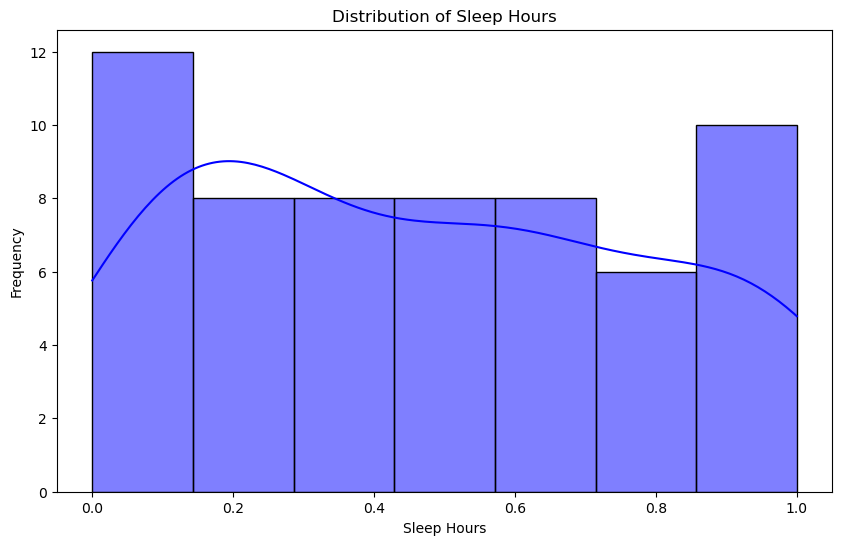

In [120]:
# Distribution of Sleep Hours
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep_Hours'], kde=True, color='blue')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

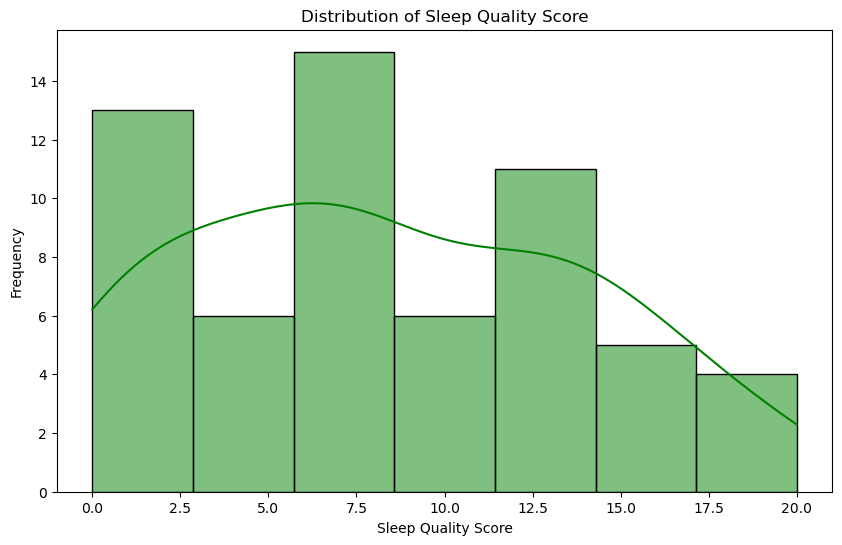

In [118]:
# Distribution of Sleep Quality Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep_Quality_Score'], kde=True, color='green')
plt.title('Distribution of Sleep Quality Score')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Frequency')
plt.show()

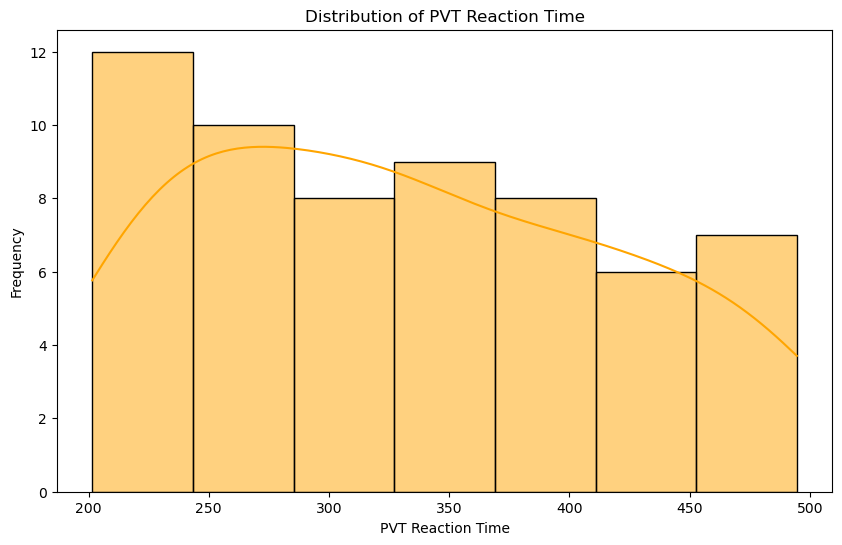

In [99]:
# Distribution of PVT Reaction Time
plt.figure(figsize=(10, 6))
sns.histplot(df['PVT_Time'], kde=True, color='orange')
plt.title('Distribution of PVT Reaction Time')
plt.xlabel('PVT Reaction Time')
plt.ylabel('Frequency')
plt.show()

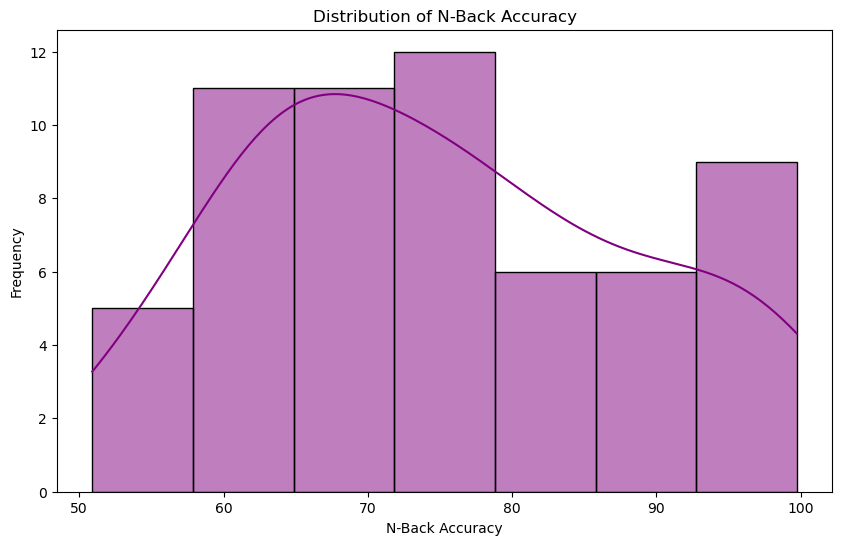

In [101]:
# Distribution of N-Back Accuracy
plt.figure(figsize=(10, 6))
sns.histplot(df['N_Back_Accuracy'], kde=True, color='purple')
plt.title('Distribution of N-Back Accuracy')
plt.xlabel('N-Back Accuracy')
plt.ylabel('Frequency')
plt.show()

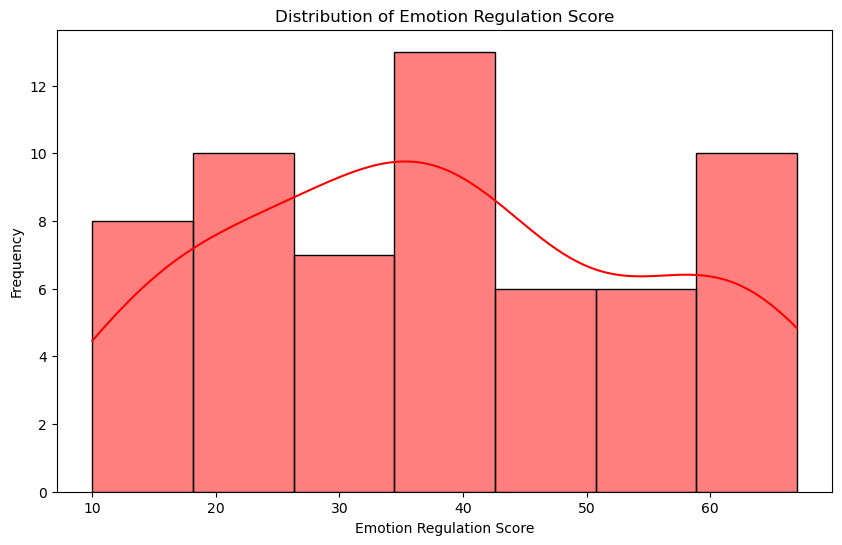

In [103]:
# Distribution of Emotion Regulation Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Emotion_Regulation_Score'], kde=True, color='red')
plt.title('Distribution of Emotion Regulation Score')
plt.xlabel('Emotion Regulation Score')
plt.ylabel('Frequency')
plt.show()

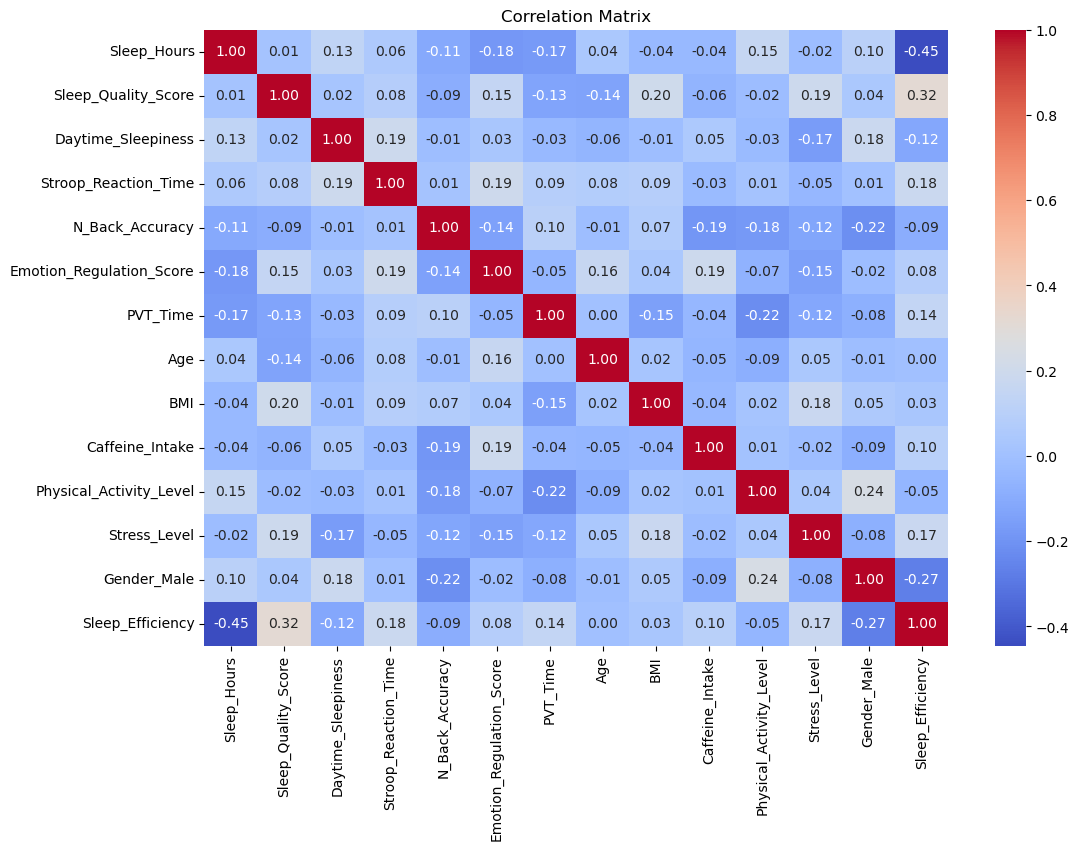

In [105]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

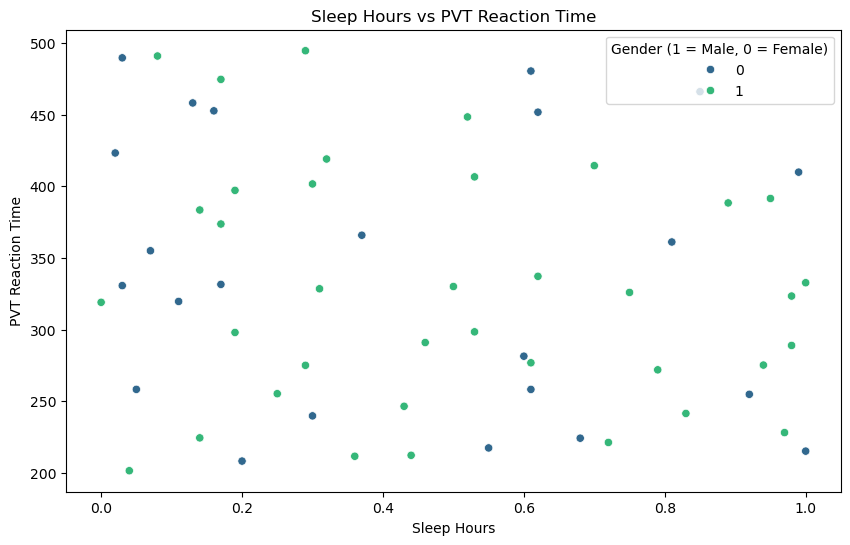

In [69]:
# Sleep Hours vs PVT Reaction Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Hours', y='PVT_Time', data=df, hue='Gender_Male', palette='viridis')
plt.title('Sleep Hours vs PVT Reaction Time')
plt.xlabel('Sleep Hours')
plt.ylabel('PVT Reaction Time')
plt.legend(title='Gender (1 = Male, 0 = Female)')
plt.show()

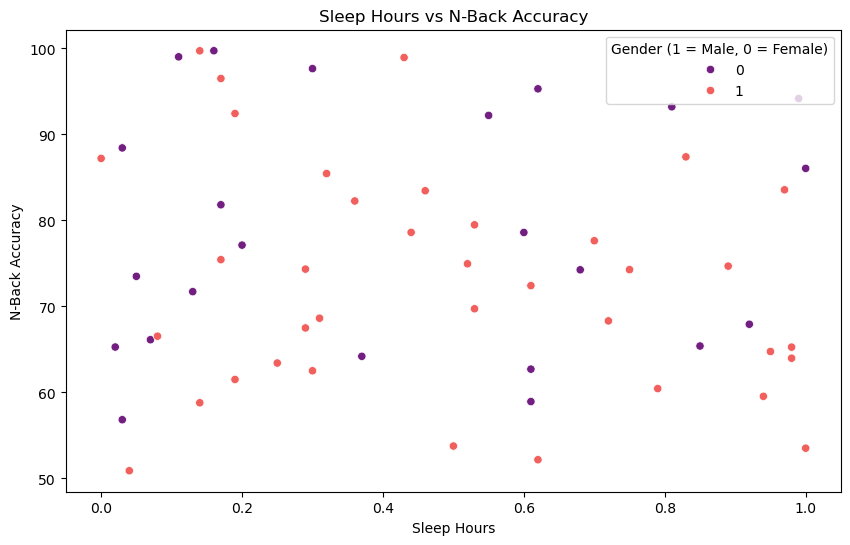

In [71]:
# Sleep Hours vs N-Back Accuracy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Hours', y='N_Back_Accuracy', data=df, hue='Gender_Male', palette='magma')
plt.title('Sleep Hours vs N-Back Accuracy')
plt.xlabel('Sleep Hours')
plt.ylabel('N-Back Accuracy')
plt.legend(title='Gender (1 = Male, 0 = Female)')
plt.show()

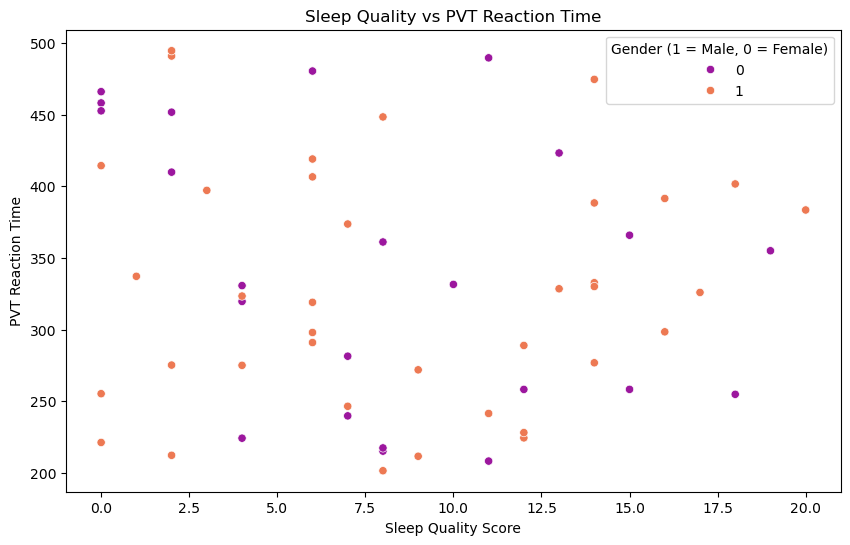

In [75]:
# Sleep Quality vs PVT Reaction Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Quality_Score', y='PVT_Time', data=df, hue='Gender_Male', palette='plasma')
plt.title('Sleep Quality vs PVT Reaction Time')
plt.xlabel('Sleep Quality Score')
plt.ylabel('PVT Reaction Time')
plt.legend(title='Gender (1 = Male, 0 = Female)')
plt.show()

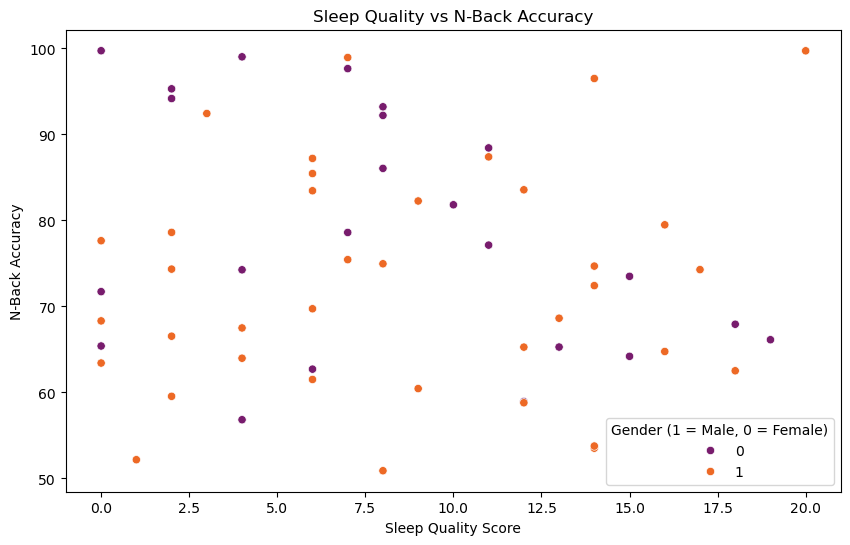

In [77]:
# Sleep Quality vs N-Back Accuracy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Quality_Score', y='N_Back_Accuracy', data=df, hue='Gender_Male', palette='inferno')
plt.title('Sleep Quality vs N-Back Accuracy')
plt.xlabel('Sleep Quality Score')
plt.ylabel('N-Back Accuracy')
plt.legend(title='Gender (1 = Male, 0 = Female)')
plt.show()

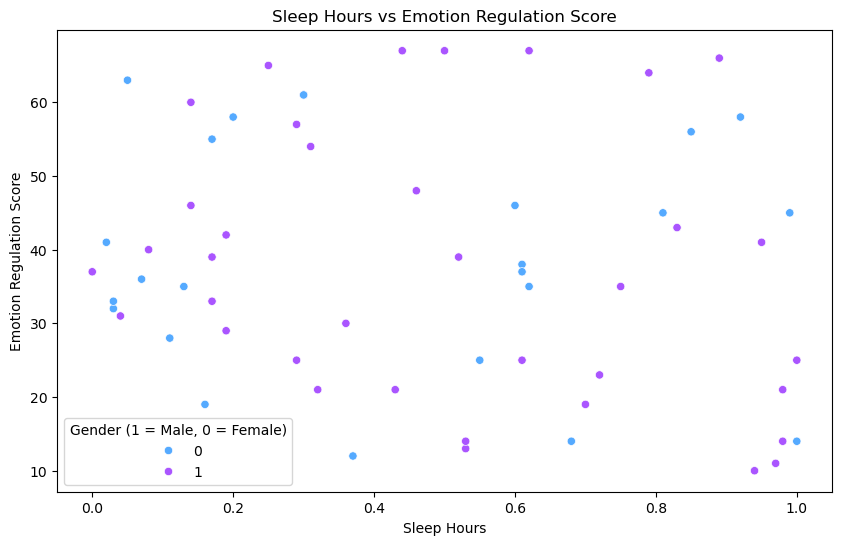

In [79]:
# Sleep Hours vs Emotion Regulation Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Hours', y='Emotion_Regulation_Score', data=df, hue='Gender_Male', palette='cool')
plt.title('Sleep Hours vs Emotion Regulation Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Emotion Regulation Score')
plt.legend(title='Gender (1 = Male, 0 = Female)')
plt.show()

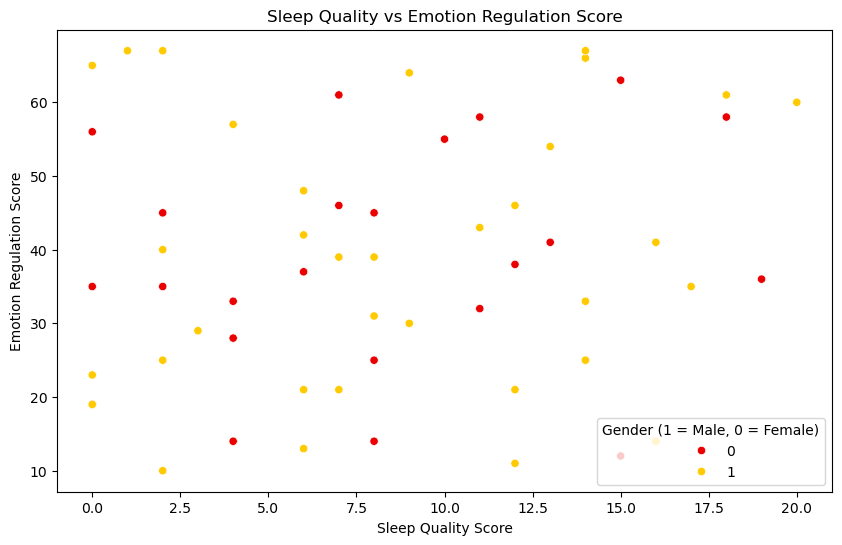

In [81]:
# Sleep Quality vs Emotion Regulation Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Quality_Score', y='Emotion_Regulation_Score', data=df, hue='Gender_Male', palette='hot')
plt.title('Sleep Quality vs Emotion Regulation Score')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Emotion Regulation Score')
plt.legend(title='Gender (1 = Male, 0 = Female)')
plt.show()

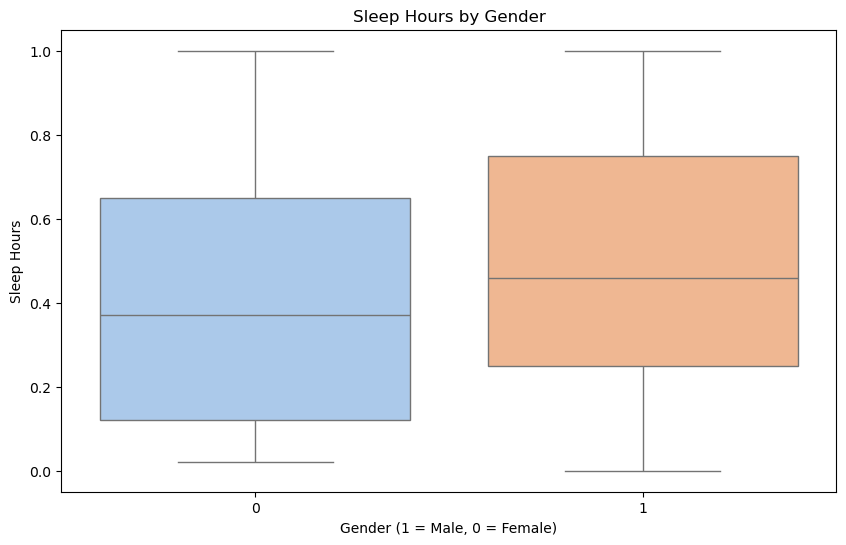

In [93]:
# Boxplot of Sleep Hours by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_Male', y='Sleep_Hours', data=df, hue='Gender_Male', palette='pastel', legend=False)
plt.title('Sleep Hours by Gender')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Sleep Hours')
plt.show()

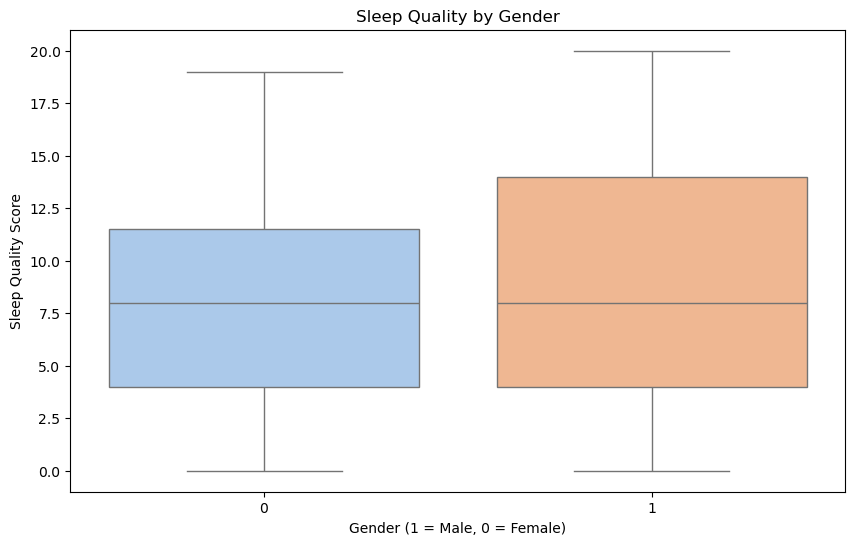

In [91]:
# Boxplot of Sleep Quality by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_Male', y='Sleep_Quality_Score', data=df, hue='Gender_Male', palette='pastel', legend=False)
plt.title('Sleep Quality by Gender')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Sleep Quality Score')
plt.show()

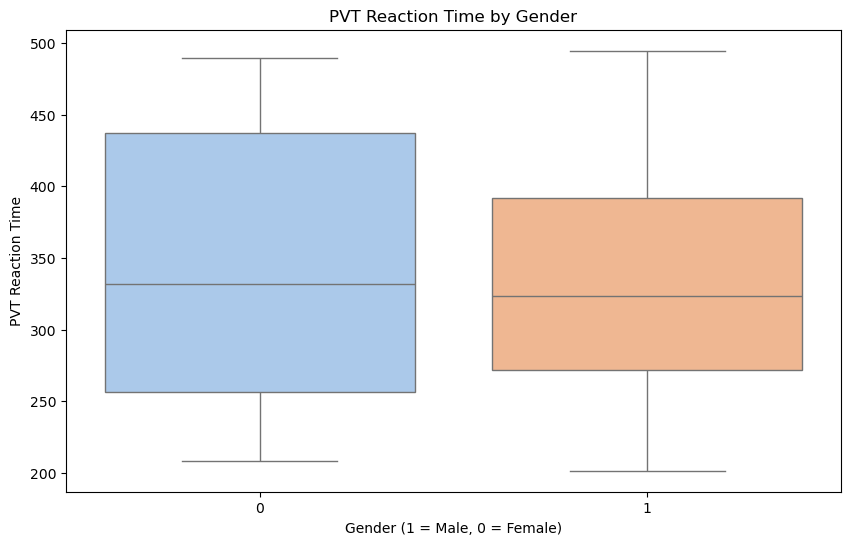

In [89]:
# Boxplot of PVT Reaction Time by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_Male', y='PVT_Time', data=df, hue='Gender_Male', palette='pastel', legend=False)
plt.title('PVT Reaction Time by Gender')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('PVT Reaction Time')
plt.show()